In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_excel("credit_card_data.xlsx", header=1)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) # Renaming mis-named column

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
#check for null values using df.info()
print("Checking for null values:")
df.info()

Checking for null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 n

In [16]:
# define the target variable
target = 'default payment next month'

print(f"Distribution of the '{target}' column:")
print(df[target].value_counts())

Distribution of the 'default payment next month' column:
default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [18]:
#The dataset is impalanced. There are about 3.5 times as many non-defaults (23364) as defaults (6636).

In [ ]:
#Some features will be investigated using the 'value_counts()' function

In [20]:
#EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 4 = others)
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [22]:
#The data contains values 0, 5, and 6, which are undocumented. We will assume they have meaning and keep them.

In [24]:
#Marriage: (1 = married; 2 = single; 3 = others)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [26]:
#The value 0 also appears in the data. We will assume that 0 is functionally the 'null' value and keep it in the dataset for now.

In [30]:
#Sex: (1 = male, 2 = female)
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [32]:
#There is a slight imbalance, with females (2) making up just over 60% of the dataset.

In [36]:
# The PAY_ columns represent the repayment status for the last six months.
# These are likely the most important features for predicting future default.
# We will start by analyzing PAY_1, the most recent payment status.

df['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [38]:
# NOTE on PAY_1 values:
# This column represents the repayment status for the most recent month (Sept 2005).
# According to the data dictionary, the values mean:
# -2: No consumption
# -1: Paid in full
#  0: Paid the minimum due
#  1: Payment delay for one month
#  2: Payment delay for two months
#  ...and so on up to 8 months.

In [40]:
# Investigate the relationship between 'Pay', 'Bill_amt', and 'Pay_amt'

for i in [-2,-1,0,1,2,8]:
    print(df[df['PAY_1']==i][['PAY_1', 'BILL_AMT1', 'PAY_AMT1']].head(8), "\n")

    PAY_1  BILL_AMT1  PAY_AMT1
9      -2          0         0
23     -2       5512     19428
33     -2      10929      4152
34     -2      13709      5006
45     -2          0         0
52     -2      13465      7875
55     -2       1905      3640
65     -2     152519         0 

    PAY_1  BILL_AMT1  PAY_AMT1
1      -1       2682         0
4      -1       8617      2000
11     -1      12261     21818
12     -1      12137      1000
21     -1        316       316
28     -1        650      3415
30     -1      16646     17270
35     -1      30265       131 

    PAY_1  BILL_AMT1  PAY_AMT1
2       0      29239      1518
3       0      46990      2000
5       0      64400      2500
6       0     367965     55000
7       0      11876       380
8       0      11285      3329
10      0      11073      2306
14      0      70887      3000 

    PAY_1  BILL_AMT1  PAY_AMT1
13      1      65802      3200
15      1      50614         0
18      1          0         0
19      1          0         0
26

In [46]:
#The data is slightly confusing, so we are going to create historgrams.

# Define function for creating histograms
def pay_hist(df, cols, ymax):
    plt.figure(figsize=(10,7))
    for index, col in enumerate(cols):
        plt.subplot(2,3, index +1)
        plt.ylim(top=ymax)
        plt.hist(df[col])
        plt.title(col)
        plt.tight_layout()

# Create lists of column names for each variable type
pay_cols = ["PAY_"+str(n) for n in range(1,7)]
pay_amt_cols = ["PAY_AMT"+str(n) for n in range(1,7)]
bill_amt_cols = ["BILL_AMT"+str(n) for n in range(1,7)]

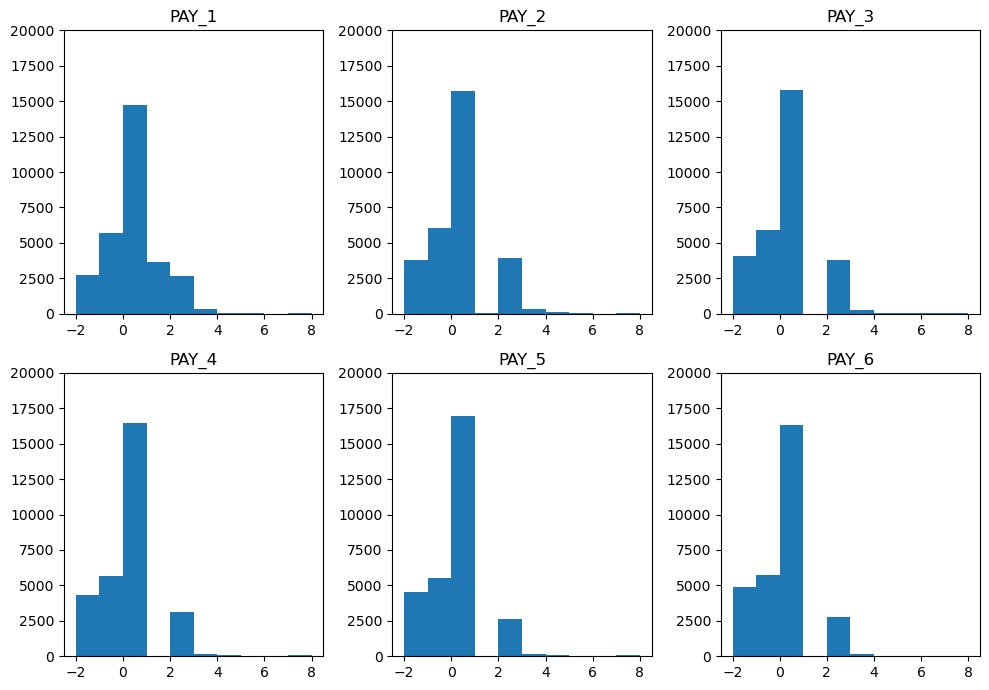

In [48]:
# Use the function to plot the histograms for the PAY columns
pay_hist(df, pay_cols, 20000)

In [50]:
#Note: 0 is the most common repayment status

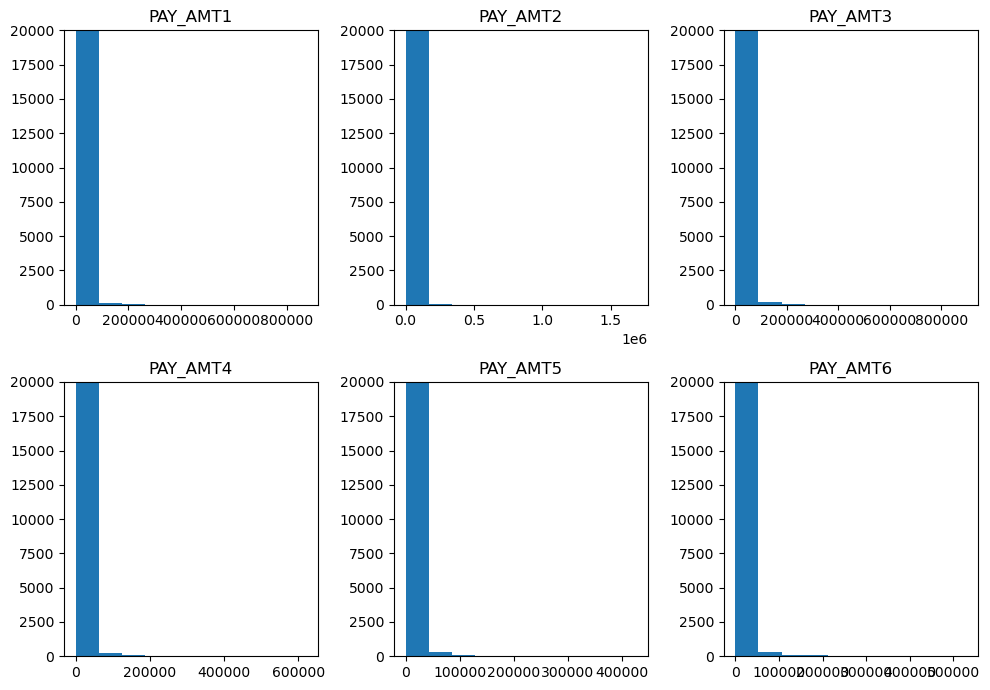

In [52]:
# Use the function to plot the histograms for the PAY_AMT columns
pay_hist(df, pay_amt_cols, 20000)

In [54]:
#Note:These plots show that the payment amount data is heavily right-skewed.
# This means that most payments are small and clustered near zero, while
# a few very large payments create a long tail to the right.

<Axes: >

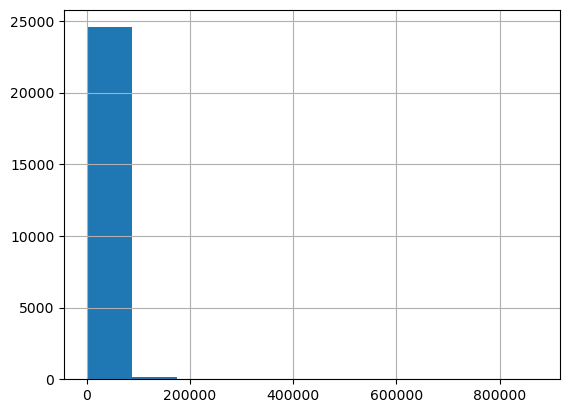

In [58]:
# NOTE: We need to confirm that the skew in the PAY_AMT1 histogram
# is a true feature of the payment data, and not just caused by the large
# number of zero-dollar payments (where no payment was made).
#
# To test this, we will create a temporary dataframe that excludes all
# the PAY_AMT1 values of 0 and plot its histogram.
# If it is still skewed, we know a log transformation will be needed
# to better visualize the distribution of actual payments.

# Create a temporary dataframe that excludes rows where PAY_AMT1 is 0
df_no_0_pay_amt_1 = df[df["PAY_AMT1"] != 0]

# Plot the histogram of non-zero payments to confirm the skew is still present
df_no_0_pay_amt_1["PAY_AMT1"].hist()

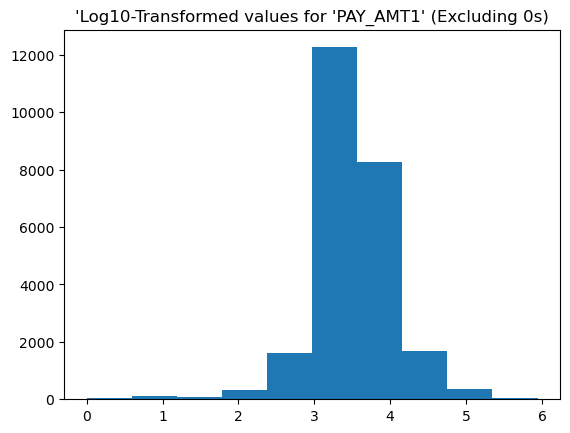

In [63]:
#Note: The PAY_AMT1 data is still skewed even after removing zeros.
# To better visualize the skewed distribution of actual payments, we apply a
# base-10 log transformation (np.log10). This is applied only to the
# non-zero payment amounts, as log10 is undefined for zero.

# Create a new variable containing the log10 transformed data
log_pay_amt1 = np.log10(df_no_0_pay_amt_1["PAY_AMT1"])

# Create a histogram of the transformed data
plt.hist(log_pay_amt1)

# Add a title to the plot
plt.title("'Log10-Transformed values for 'PAY_AMT1' (Excluding 0s)")
plt.show() # Display the plot cleanly

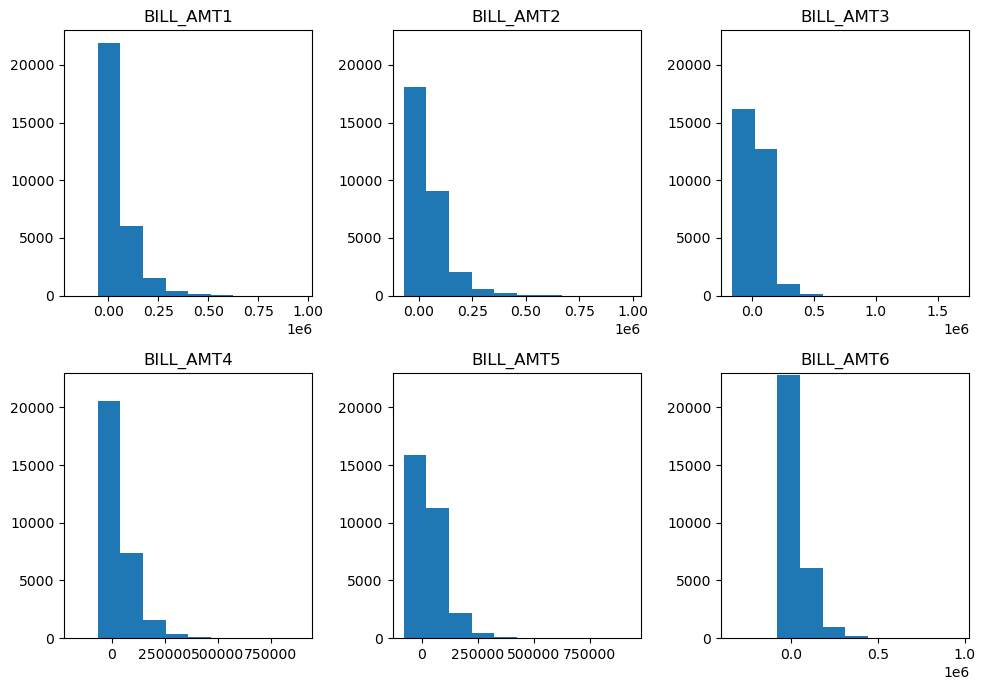

In [67]:
pay_hist(df, bill_amt_cols, 23000)

In [69]:
#Note: These plots visualize the distribution of the bill amount (BILL_AMT) columns.
# As with the payment amounts, this data is also heavily right-skewed,
# indicating that most customers have smaller balances while a few have very high ones.

In [71]:
#Note: Preprocessing- convert all features into a purely numerical format.
# 1. Binary Encoding:
#    - Definition: A technique for features with only two categories.
#    - Action: We will map the 'SEX' column from (1, 2) to a binary (0, 1) format.
# 2. One-Hot Encoding:
#    - Definition: A technique for features with more than two categories. It
#      converts the single column into multiple new binary (0/1) columns.
#    - Action: We will apply this to 'EDUCATION' and 'MARRIAGE' to prevent the
#      model from assuming a false ranking between their categories.
# 3. Renaming:
#    - Action: Several columns will be renamed for simplicity and clarity.

In [73]:
# Step 1: Map the 'SEX' column to binary (0/1)
df['SEX'] = df['SEX'].map({1:0, 2:1})

print("New value counts for the 'SEX' column:")
print(df['SEX'].value_counts())

New value counts for the 'SEX' column:
SEX
1    18112
0    11888
Name: count, dtype: int64


In [75]:
# Rename columns for clarity and simplicity
df.rename(columns={'SEX': 'FEMALE', 'default payment next month': 'default'}, inplace=True)

print("Columns have been renamed. Here are the first 5 rows:")
print(df.head())

Columns have been renamed. Here are the first 5 rows:
   ID  LIMIT_BAL  FEMALE  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  \
0   1      20000       1          2         1   24      2      2     -1   
1   2     120000       1          2         2   26     -1      2      0   
2   3      90000       1          2         2   34      0      0      0   
3   4      50000       1          2         1   37      0      0      0   
4   5      50000       0          2         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  P

In [77]:
#Note: Use pd.get_dummies() because the scikit-learn library, which we are
# using for our Random Forest model, requires all input features to be numerical.
# This function handles the one-hot encoding for our 'EDUCATION' and 'MARRIAGE'
# columns, converting them into a numerical format the model can use.

In [79]:
df.rename(columns={'EDUCATION': 'EDU', 'MARRIAGE': 'MAR'}, inplace=True)

#Apply one-hot encoding
df = pd.get_dummies(df, columns=['EDU', 'MAR'], drop_first=True)

# Display the head and info to see the new columns
print("Data after one-hot encoding:")
print(df.head())

Data after one-hot encoding:
   ID  LIMIT_BAL  FEMALE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  ...  \
0   1      20000       1   24      2      2     -1     -1     -2     -2  ...   
1   2     120000       1   26     -1      2      0      0      0      2  ...   
2   3      90000       1   34      0      0      0      0      0      0  ...   
3   4      50000       1   37      0      0      0      0      0      0  ...   
4   5      50000       0   57     -1      0     -1      0      0      0  ...   

   default  EDU_1  EDU_2  EDU_3  EDU_4  EDU_5  EDU_6  MAR_1  MAR_2  MAR_3  
0        1  False   True  False  False  False  False   True  False  False  
1        1  False   True  False  False  False  False  False   True  False  
2        0  False   True  False  False  False  False  False   True  False  
3        0  False   True  False  False  False  False   True  False  False  
4        0  False   True  False  False  False  False   True  False  False  

[5 rows x 32 columns]


In [81]:
# The original 'EDU' and 'MAR' columns have been removed.
# Machine learning models require all input to be numerical.
# A column like 'EDUCATION' uses numbers (1, 2, 3, etc.), but these are just codes
# for categories (graduate school, university, high school). If we feed these
# numbers directly to the model, it might learn a false and meaningless ranking,
# mistakenly thinking that 'high school' (3) is 'greater than' 'graduate school' (1).
#
# To fix this, we use one-hot encoding. This converts the single
# categorical column into multiple new binary (0/1) columns. Each new column
# acts like a "Yes/No" question (e.g., "Is the education level 'university'?").
#
# We use pd.get_dummies() because the scikit-learn library requires
# this numerical format.

In [91]:
# We will test four related, tree-based models:
# 1. Decision Tree: The simplest model and our starting point.
# 2. Bagging: An "ensemble" method that trains many Decision Trees on random
#    data samples and uses a majority vote to improve stability.
# 3. Random Forest: An enhancement of Bagging that adds more randomness,
#    often leading to better performance.
# 4. Extra Trees: A variation of Random Forest that uses even more randomness.

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Separate the data into features (X) and the target variable (y)
# 'X' will contain all columns except our target, 'default'
X = df.drop(columns=['default'])
# 'y' will contain only the 'default' column
y = df['default']

# Split the data into training and testing sets
# 70% of the data will be used for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1738)

# Create an instance of each of the four models we will test as a baseline
dt = DecisionTreeClassifier()
bag = BaggingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

print("Setup complete. Data is split and models are ready to be trained.")

Setup complete. Data is split and models are ready to be trained.


In [ ]:
# For each model, we will look at the classification_report. Our primary goal is to
# see which model gives the best 'recall' score for class 1 (defaults), as finding
# actual defaults is our main objective.

In [93]:
# NOTE: Baseline Model 1 - Decision Tree
# ----------------------------------------
# This is our first and simplest model, which will serve as our baseline.
#
# What it is: A Decision Tree is a model that makes predictions by asking
# a series of "yes/no" questions about the data's features, creating a
# flowchart of decisions.
#
# Why we use it: We are using it to get an initial performance score. While
# simple to understand, single decision trees are prone to "overfitting"
# (learning the training data too well) and may not perform well on new data.
# Our goal is to improve upon this baseline score with more advanced models.

dt.fit(X_train, y_train)

print("\n--- Decision Tree Performance ---")
print(classification_report(y_test, dt.predict(X_test)))

# NOTE: Baseline Model 2 - Bagging Classifier
# ---------------------------------------------
# "Bagging" stands for Bootstrap Aggregating. It's an ensemble method, meaning
# it combines multiple models to get a better result.
#
# What it is: Instead of training just one Decision Tree, Bagging trains MANY
# Decision Trees on different random samples of the training data. To make a
# prediction, it takes a majority vote from all the trees.
#
# Why we use it: This process helps to reduce the overfitting of a single
# Decision Tree. By averaging the votes of many trees, the errors and biases
# of individual trees tend to cancel each other out, leading to a more stable
# and accurate model.

bag.fit(X_train, y_train)

print("\n--- Bagging Classifier Performance ---")
print(classification_report(y_test, bag.predict(X_test)))

# NOTE: Baseline Model 3 - Random Forest
# ----------------------------------------
# Random Forest is another ensemble method and a popular enhancement of Bagging.
#
# What it is: Like Bagging, it trains many Decision Trees on random samples of
# the data. However, it adds another layer of randomness: when building each
# tree, it only considers a random subset of *features* at each split point.
#
# Why we use it: This extra randomness forces the trees to be more diverse and
# prevents them all from relying on the same one or two powerful features. This
# often leads to a more robust and accurate model than a standard Bagging classifier.

rf.fit(X_train, y_train)

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, rf.predict(X_test)))

# NOTE: Baseline Model 4 - Extra Trees
# --------------------------------------
# "Extra" stands for Extremely Randomized. This is a variation of Random Forest.
#
# What it is: It's like a Random Forest, but with even *more* randomness. In
# addition to selecting a random subset of features at each split, it also
# tests a set of random thresholds to make the split, instead of finding the
# absolute best one.
#
# Why we use it: This extreme randomness can sometimes lead to a slightly
# better model and is often faster to train. We test it to see if this
# different approach works better for our specific dataset.

et.fit(X_train, y_train)

print("\n--- Extra Trees Performance ---")
print(classification_report(y_test, et.predict(X_test)))


--- Decision Tree Performance ---
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7042
           1       0.37      0.39      0.38      1958

    accuracy                           0.72      9000
   macro avg       0.60      0.60      0.60      9000
weighted avg       0.73      0.72      0.73      9000


--- Bagging Classifier Performance ---
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7042
           1       0.59      0.32      0.42      1958

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.80      0.78      9000


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7042
           1       0.64      0.35      0.45      1958

    accuracy                           0.82      9000
   macro avg      

In [95]:
# NOTE: Understanding the Performance Report
# -----------------------------------------
# The `classification_report` gives us a detailed look at the model's performance,
# which is much more useful than simple accuracy on imbalanced data. Here is what
# the key metrics for the 'default' class (1) mean:
#
# - Precision: Of all the customers the model PREDICTED would default, what
#   percentage actually did? (This measures the quality of the positive predictions).
#
# - Recall: Of all the customers that ACTUALLY defaulted, what percentage did
#   our model successfully find? (This measures the completeness of the predictions).
#   **This is our most important metric for this project.**
#
# - F1-score: The balanced average of Precision and Recall. It's a good
#   overall measure if you care about both metrics equally.
#
# - Support: This is simply the number of actual examples of that class in the
#   test data. For class 1, it's the total number of actual defaults in the test set.

In [97]:
# NOTE: Analyzing the Baseline Results
# ------------------------------------
# This note explains the performance report using the Random Forest model as a
# specific example. Our main goal is to improve the 'recall' for class 1.
#
# Support:
# - What it is: The number of actual examples of a class in the test data.
# - Our Result: The support for class 1 is 1958. This means there
#   were 1,958 actual defaulters in our test set.
#
# Recall:
# - What it is: Of all the customers that ACTUALLY defaulted, what percentage
#   did our model successfully find?
# - Our Result: The recall for class 1 is 0.35 (or 35%). This means
#   our model only found 35% of the 1,958 actual defaulters, missing the other 65%.
#   **This is our most important metric to improve.**
#
# Precision:
# - What it is: Of all the customers the model PREDICTED would default, what
#   percentage were correct?
# - Our Result: The precision for class 1 is 0.64 (or 64%). This means
#   when the model predicted a default, it was right 64% of the time.
#
# F1-Score:
# - What it is: The balanced average of Precision and Recall.
# - Our Result: The F1-score of 0.45 reflects the trade-off between our
#   higher precision and lower recall.

In [99]:
# NOTE: Hyperparameter Tuning the Random Forest Model
# ---------------------------------------------------
# **Why this model?**
# Although the single Decision Tree had a slightly higher baseline recall, we are
# choosing to tune the Random Forest model. This is because Random Forest is an
# "ensemble" method that is much more stable and reliable. Its performance is
# less likely to be a fluke, so the improvements we make during tuning are more
# trustworthy for predicting future data.
#
# **What we are doing:**
# We are now performing "hyperparameter tuning." This is the process of
# systematically trying different settings for the model to find the combination
# that gives the best performance. Our goal is to find the settings that
# maximize the 'recall' score for the default class.


In [101]:
# This first step is a broad search across two key settings:
# - criterion: The method for splitting the data ('gini' or 'entropy').
# - n_estimators: The number of trees in the forest.

from sklearn.metrics import recall_score

# Create a dictionary to store the results
scores = {}
i = 0

# Loop through each criterion and number of estimators
for c in ['gini', 'entropy']:
    for e in [5,10,20,50,100]:
        # Create and train the model with the current settings
        rf_tune = RandomForestClassifier(n_estimators=e, criterion=c, random_state=1738)
        rf_tune.fit(X_train, y_train)

        # Calculate the recall score and store it
        scores[i] = {'recall':recall_score(y_test, rf_tune.predict(X_test)), 'trees':e, 'crit':c}
        i+=1

# Convert the results dictionary to a DataFrame for easy viewing
df_scores = pd.DataFrame(scores).T
print(df_scores)

     recall trees     crit
0  0.365679     5     gini
1  0.318693    10     gini
2  0.333504    20     gini
3  0.350868    50     gini
4  0.350868   100     gini
5  0.364147     5  entropy
6  0.321757    10  entropy
7  0.331971    20  entropy
8  0.341164    50  entropy
9  0.342697   100  entropy


In [103]:
# NOTE: Analyzing the Results
# ----------------------------------------
# The table above shows the 'recall' score for each combination of settings we tested.
# Our goal is to find the row with the highest recall for our default class.
#
# Key Findings:
# - The best recall score (0.365679) was achieved using the 'gini' criterion
#   with only 5 trees.
# - Across both 'gini' and 'entropy', performance generally decreased as the number
#   of trees increased beyond 5.
#
# Conclusion: This suggests that for our dataset, a smaller, simpler forest is
# most effective. Our next tuning step will be a more focused search on models
# with a small number of trees, using the 'gini' criterion.

In [105]:
# NOTE: The 2nd step of Hyperparameter Tuning is a Focused Search
# ----------------------------------------------
# The broad search showed that our best recall came from a 'gini' model with
# a small number of trees.
#
# This next step is a more focused search to see if we can find an even
# better score within that specific range. We will now test the 'gini' model
# with every number of trees from 1 to 8 to pinpoint the absolute best
# 'n_estimators' value.

In [107]:
# Create a second dictionary to store the new results
scores2 = {}
i = 0

# Loop through the number of estimators from 1 to 8
for e in range(1,9):
    # Create and train the model with the current settings
    rf_tune2 = RandomForestClassifier(n_estimators=e, criterion='gini', random_state=1738)
    rf_tune2.fit(X_train, y_train)

    # Calculate the recall score and store it
    scores2[i] = {'recall':recall_score(y_test, rf_tune2.predict(X_test)), 'trees':e}
    i+=1

# Convert the results to a DataFrame
df_scores2 = pd.DataFrame(scores2).T
print(df_scores2)

     recall  trees
0  0.416241    1.0
1  0.223698    2.0
2  0.375894    3.0
3  0.267109    4.0
4  0.365679    5.0
5  0.281920    6.0
6  0.367722    7.0
7  0.305414    8.0


In [109]:
# NOTE: Final Tuning Results and Analysis
# The table from our focused search shows the recall score for a 'gini' model
# with the number of trees ranging from 1 to 8.
#
# The Finding:
# The results show that the highest recall score (approximately 0.416) was
# achieved with just 1 tree.
#
# The Interpretation:
# This is a surprising and important finding. It suggests that for this specific
# data split, a very simple model (a single Decision Tree) is the most
# effective at achieving our specific goal of maximizing recall. This highlights
# that more complex models are not always the best for every task.
#
# Our final, tuned model is a RandomForestClassifier with n_estimators=1.

In [ ]:
# FINAL NOTE on Hyperparameter Tuning:
# ------------------------------------
# While our tuning process identified a model with the best recall on our
# test set, it's important to be aware of the risk of "overfitting to the
# test set." By repeatedly testing different settings against the same test
# data, we may have found a model that is specifically good at predicting
# that data, but not necessarily better in a general sense.
